In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler

In [7]:
test = pd.read_csv('C:/Users/user/github/Data/aifactory/test_data.csv')
train = pd.read_csv('C:/Users/user/github/Data/aifactory/train_data.csv')

In [8]:
train = train.drop(['out_pressure', 'type'], axis=1)
test = test.drop(['out_pressure', 'type'],axis=1)

In [4]:
from sklearn.preprocessing import Normalizer

In [5]:
from sklearn.cluster import KMeans
from sklearn.covariance import MinCovDet
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import pairwise_distances


In [11]:
scaler = StandardScaler()

In [13]:
train = scaler.fit_transform(train)

In [14]:
test = scaler.fit_transform(test)

In [19]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

In [52]:
input_dim = train.shape[1]

input_layer = Input(shape=(input_dim,))
encoder = Dense(8, activation='relu')(input_layer)
decoder = Dense(input_dim, activation='sigmoid')(encoder)

autoencoder = Model(input_layer, decoder)
autoencoder.compile(optimizer='adam', loss='mse')


In [63]:
autoencoder.fit(train, train, epochs=100, batch_size=50, shuffle=True)

Epoch 1/100
50/50 [==============================] - 0s 551us/step - loss: 0.5829
Epoch 2/100
50/50 [==============================] - 0s 548us/step - loss: 0.5829
Epoch 3/100
50/50 [==============================] - 0s 733us/step - loss: 0.5829
Epoch 4/100
50/50 [==============================] - 0s 633us/step - loss: 0.5829
Epoch 5/100
50/50 [==============================] - 0s 593us/step - loss: 0.5829
Epoch 6/100
50/50 [==============================] - 0s 572us/step - loss: 0.5829
Epoch 7/100
50/50 [==============================] - 0s 531us/step - loss: 0.5829
Epoch 8/100
50/50 [==============================] - 0s 531us/step - loss: 0.5829
Epoch 9/100
50/50 [==============================] - 0s 534us/step - loss: 0.5829
Epoch 10/100
50/50 [==============================] - 0s 551us/step - loss: 0.5829
Epoch 11/100
50/50 [==============================] - 0s 510us/step - loss: 0.5829
Epoch 12/100
50/50 [==============================] - 0s 530us/step - loss: 0.5829
Epoch 13/100


In [64]:
x_pred = autoencoder.predict(test)
mse = np.mean(np.power(test - x_pred, 2), axis=1)

231/231 [==============================] - 0s 425us/step


In [65]:
# 이상치 검출
threshold = np.mean(mse) + 3*np.std(mse)
outliers = np.where(mse > threshold)[0]

In [66]:
threshold

2.6226432525793255

In [67]:
outliers

array([2406, 2413, 2416, 2418, 2420, 2425, 2428, 2429, 2430, 2455, 2457,
       2464, 2468, 2478, 2479, 2488, 2492, 2509, 2510, 2517, 2518, 2529,
       2536, 2541, 2560, 2573, 2575, 2594, 2612, 2619, 2622, 2624, 2637,
       2668, 2683, 2691, 2697, 2699, 2701, 2715, 2716, 2724, 2735, 2736,
       2739, 2745, 2750, 2753, 2758, 2764, 2768, 2781, 2782, 2793, 2797,
       2802, 2805, 2806, 2810, 2813, 2816, 2817, 2825, 2836, 2847, 2853,
       2862, 2864, 2873, 2879, 2887, 2888, 2889, 2895, 2913, 2915, 2918,
       2935, 2940, 2941, 2946, 2972, 2978, 2980, 2986, 2987, 3007, 3086,
       3088, 3094, 3109, 3110, 3112, 3142, 3143, 3154, 3155, 3168, 3170,
       3182, 3185, 3198, 3211, 3225, 3258, 3269, 3282, 3293, 3299, 3316,
       3322, 3341, 3368, 3396, 3400, 3407, 3416, 3417, 3431, 3500, 3507,
       3529, 3542, 3559, 3572, 3605, 3616, 3625, 3636, 3647, 3648, 3654,
       3706, 3710, 3748, 3757, 3781, 3790, 3822, 3858, 3866, 3867, 3871,
       3880, 3888, 3896, 3897, 3935, 3942, 3950, 39

In [29]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import GridSearchCV

In [30]:
clf = LocalOutlierFactor(n_neighbors=10, contamination=0.5)

In [31]:
param_grid = {'n_neighbors' : [5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28], 'contamination' : [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],}

In [32]:
clf = LocalOutlierFactor()

In [33]:
grid_search = GridSearchCV(estimator=clf, 
                           param_grid=param_grid,
                           scoring='accuracy', 
                           n_jobs=-1, 
                           verbose=2
                          )

In [34]:
grid_search.fit(train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(estimator=LocalOutlierFactor(), n_jobs=-1,
             param_grid={'contamination': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7,
                                           0.8, 0.9],
                         'n_neighbors': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,
                                         16, 17, 18, 19, 20, 21, 22, 23, 24, 25,
                                         26, 27, 28]},
             scoring='accuracy', verbose=2)

In [35]:
grid_search.best_params_

{'contamination': 0.1, 'n_neighbors': 5}

In [37]:
clf2 = LocalOutlierFactor(n_neighbors=5, contamination=0.1)

In [38]:
clf2.fit(train)

LocalOutlierFactor(contamination=0.1, n_neighbors=5)

In [39]:
clf2.fit_predict(test)

array([-1,  1,  1, ...,  1,  1,  1])

In [40]:
x_score = clf2.negative_outlier_factor_

(-6.0, 0.5)

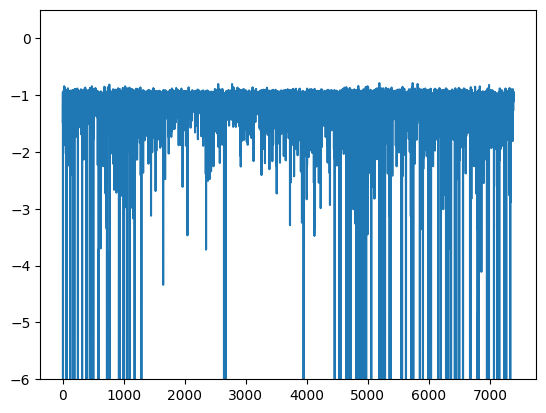

In [41]:
plt.plot(x_score)
plt.ylim(-6,0.5)

In [43]:
threshold = np.percentile(x_score, 5)

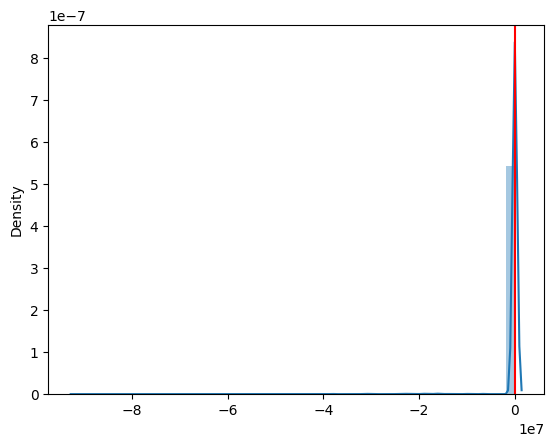

In [70]:
sns.distplot(x_score)
plt.axvline(threshold, color = 'r')

In [51]:
np.where(x_score<threshold)[0]

array([   3,    9,   51,   62,  104,  123,  125,  150,  168,  177,  190,
        248,  317,  343,  375,  387,  396,  444,  458,  493,  500,  573,
        586,  587,  588,  589,  590,  591,  596,  597,  598,  599,  621,
        626,  627,  632,  664,  700,  715,  717,  719,  721,  723,  724,
        725,  726,  727,  769,  784,  790,  829,  841,  857,  868,  878,
        887,  920,  924,  933,  951,  954,  957,  996, 1027, 1030, 1051,
       1087, 1095, 1108, 1137, 1152, 1177, 1209, 1218, 1277, 1288, 1317,
       1404, 1446, 1466, 1521, 1527, 1534, 1597, 1629, 1645, 1677, 1736,
       1899, 1906, 1934, 1963, 2018, 2043, 2300, 2343, 2348, 2363, 2379,
       2407, 2430, 2470, 2471, 2545, 2573, 2610, 2642, 2643, 2644, 2645,
       2646, 2647, 2648, 2649, 2650, 2651, 2652, 2653, 2654, 2656, 2657,
       2658, 2659, 2663, 2666, 2668, 2908, 2916, 3030, 3126, 3256, 3260,
       3268, 3295, 3313, 3386, 3434, 3447, 3503, 3505, 3509, 3559, 3621,
       3653, 3723, 3732, 3734, 3753, 3790, 3807, 38